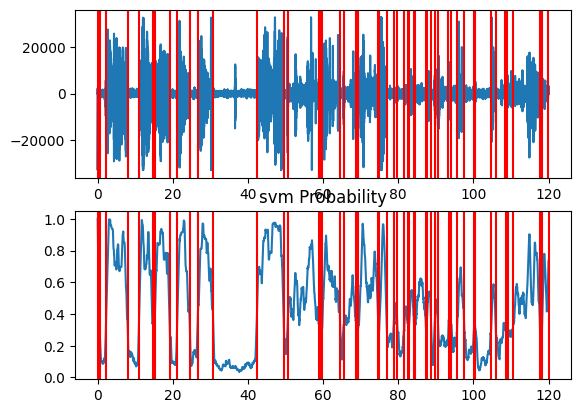

In [7]:
#import required libraries
import os
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
# path to audio file
file ='../assets/202402181903_one_channel_120sec.wav'

assert os.path.isfile(file)

# below method returns the active / non silent segments of the audio file 
[Fs, x] = aIO.read_audio_file(file)
segments = aS.silence_removal(x, 
                             Fs, 
                             0.020, 
                             0.020, 
                             smooth_window=1.0, 
                             weight=0.3, 
                             plot=True)

In [20]:
print(segments, len(segments))

[[0.0, 0.5], [2.22, 7.96], [11.0, 14.86], [15.16, 19.16], [21.16, 24.52], [26.580000000000002, 30.76], [42.300000000000004, 49.54], [50.56, 58.96], [59.04, 59.46], [59.800000000000004, 64.52], [65.46000000000001, 68.8], [68.96000000000001, 69.22], [69.36, 74.68], [74.98, 76.92], [78.78, 79.72], [81.62, 82.60000000000001], [82.84, 84.3], [84.42, 87.32000000000001], [87.58, 88.74], [89.66, 90.56], [93.36, 94.14], [95.68, 97.54], [100.18, 100.44], [104.74000000000001, 105.9], [108.54, 109.06], [110.52, 117.66], [118.26, 119.98]] 27


In [10]:
from pydub import AudioSegment
myaudio = AudioSegment.from_wav(file)

In [22]:
START, END = 0, 1
if segments:
    for index, segment in enumerate(segments):
        extract = myaudio[segment[START]*1000:segment[END]*1000]
        extract.export(f'paa-extract-{index}.wav', format="wav")